In [66]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras.utils import normalize, np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten
%matplotlib inline

In [50]:
mnist = datasets.mnist

In [3]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_data',
 'np',
 'print_function']

In [10]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.



In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [11]:
print('train data shape:',train_data.shape)
print('train labels shape:',train_labels.shape)
print('test data shape:',test_data.shape)
print('test labels shape:',test_labels.shape)

train data shape: (60000, 28, 28)
train labels shape: (60000,)
test data shape: (10000, 28, 28)
test labels shape: (10000,)


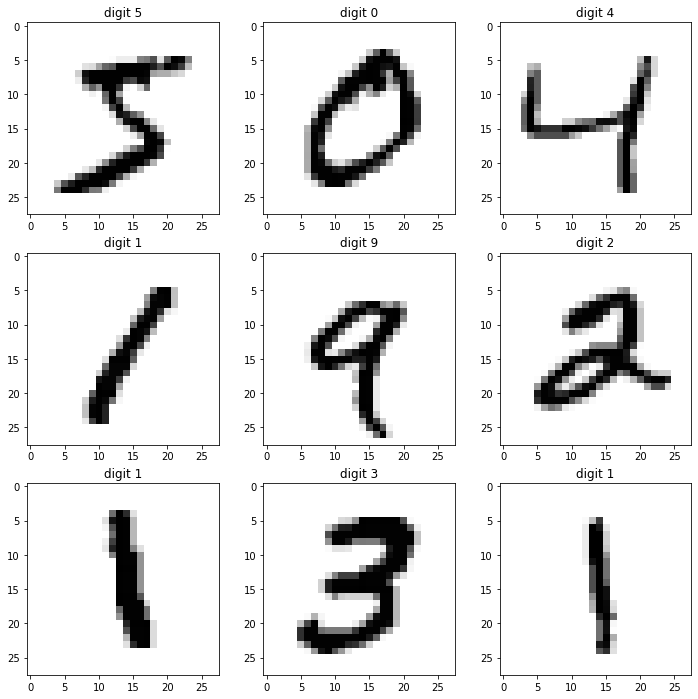

In [45]:
fig, ax = plt.subplots(3,3, figsize=(12,12))

k = 0
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(train_data[k], cmap = plt.cm.binary)
    ax[i,j].set_title('digit {}'.format(train_labels[k]) )
    k+=1
plt.show()

In [70]:
x_train = normalize(train_data, axis = 1)
x_test = normalize(test_data,axis = 1)
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [69]:
y_train.shape

(60000, 10)

In [73]:
model = Sequential()
#Hidden layers
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
#output layer
model.add(Dense(10, activation='softmax'))

In [75]:
#compile model
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0380 - accuracy: 0.9873
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0288 - accuracy: 0.9905
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0240 - accuracy: 0.9917
Epoch 4/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0186 - accuracy: 0.9938
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0174 - accuracy: 0.9938


In [81]:
predictions = model.predict(x_test)
predictions[0]

array([8.3096419e-11, 5.2693995e-12, 7.3396045e-10, 2.7924507e-09,
       3.3868855e-13, 2.3159469e-12, 3.1776041e-16, 1.0000000e+00,
       1.5666148e-12, 4.7789104e-08], dtype=float32)

In [83]:
print('Actual digit',y_test[0])
print('Predicted digit',np.argmax(predictions[0]))

Actual digit [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted digit 7


In [84]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 30us/step
0.11581807036018872 0.9722999930381775
